In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [3]:
#define the true a parameters from panda.urdf
a_link7_true = np.array([0.45,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3])
a_true =  np.array([2.34,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              2.36,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              2.38,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              2.43,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              3.5,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              1.47,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3,
              0.45,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3])

In [4]:
# get simulation and regression data
data = np.load('robot_data.npz')
# np.savez('robot_data.npz', Y_link7=regressor_link7_all, Y=regressor_all, 
#             a_link7=a_link7_pred,a=a_pred,
#             u_link7=tau_mes_link7_all,u_link7_pred=tau_mes_link7_pred,u=tau_mes_all,u_pred=tau_mes_all_pred)
Y_link7 = data['Y_link7']
Y = data['Y']
a_link7_pred = data['a_link7']
a_pred = data['a']
u_link7 = data['u_link7']
u_link7_pred = data['u_link7_pred']
u = data['u']
u_pred = data['u_pred']
print('shape:\nY_link7',  Y_link7.shape)
print('Y',  Y.shape)
print('a_link7_pred', a_link7_pred.shape)
print('a_pred', a_pred.shape)
print('u_link7', u_link7.shape)
print('u_link7_pred', u_link7_pred.shape)
print('u', u.shape)
print('u_pred', u_pred.shape)

shape:
Y_link7 (10001, 10)
Y (70007, 70)
a_link7_pred (10, 1)
a_pred (70, 1)
u_link7 (10001, 1)
u_link7_pred (10001, 1)
u (70007, 1)
u_pred (70007, 1)


In [6]:
print('a_link7',a_link7_pred.reshape(1,10))
a_link7_true = np.array([0.45,0,0,0,0.3,0.0,0.0,0.3,0.0,0.3])

a_link7 [[ 0.00000000e+00 -2.17205968e-02  4.92760891e-02 -7.52700460e-17
  -1.93891855e-02 -8.94590448e-04  1.93891855e-02 -1.18568806e-02
  -2.36148975e-02  5.75700984e-01]]


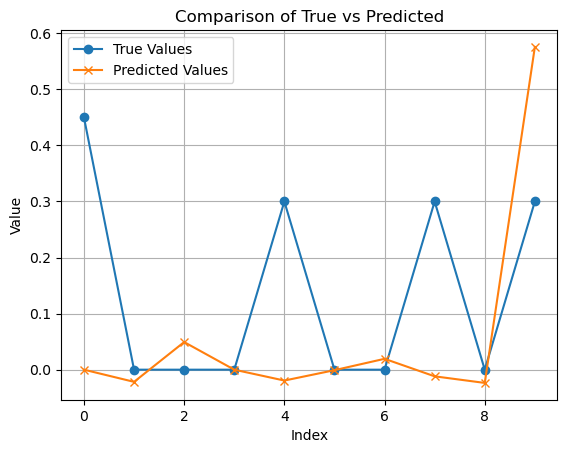

In [100]:
#part 1 begin
#compare predicted a parameters of link 7 to true value
plt.plot(a_link7_true, label='True Values', marker='o')
plt.plot(a_link7_pred, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

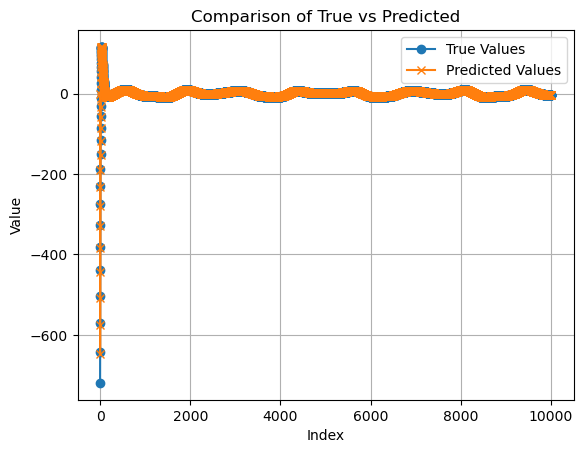

In [101]:
#compare predicted torque of link 7 to true value
plt.plot(u_link7, label='True Values', marker='o')
plt.plot(u_link7_pred, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
#calculate  F-statistics for link 7 regression
u_mean = np.mean(u_link7)
TSS = np.sum((u_link7 - u_mean)**2)
RSS = np.sum((u_link7 - u_link7_pred)**2)
n, p = Y_link7.shape
F_stat = ((TSS - RSS) / p) / (RSS / (n - p -1))
print("F-statistic =", F_stat)

F-statistic = 4538.592560147591


In [103]:
#Adjusted R-squared for link 7 regression
R_squared = 1-RSS/TSS
Adj_R_squared = 1-((1-R_squared)*(n-1)/(n-p-1))
print("Adj_R_squared =", Adj_R_squared)

Adj_R_squared = 0.8194161110377273


In [114]:
#Confidence intervals
sigma_squared = np.sum((u_link7 - u_link7_pred)**2)/(n-p)
XtX_inv = np.linalg.pinv(Y_link7.T @ Y_link7)
SE = np.sqrt(np.maximum(0, np.diag(XtX_inv) * sigma_squared)).reshape(p,1)
confidence = 0.98           # confidence interval
alpha = 1 - confidence      # 
t_star = t.ppf(1 - alpha / 2, n-p)
CI = np.column_stack([a_link7_pred  - t_star * SE, a_link7_pred  + t_star * SE])
print("CI", CI)

CI [[ 0.00000000e+00  0.00000000e+00]
 [-6.83844872e-02  2.49432937e-02]
 [ 1.11411126e-02  8.74110655e-02]
 [-7.52700460e-17 -7.52700460e-17]
 [-2.80958473e-02 -1.06825238e-02]
 [-1.87878675e-02  1.69986866e-02]
 [ 1.06825238e-02  2.80958473e-02]
 [-2.81608892e-02  4.44712801e-03]
 [-3.64430892e-02 -1.07867058e-02]
 [ 5.51018959e-01  6.00383010e-01]]


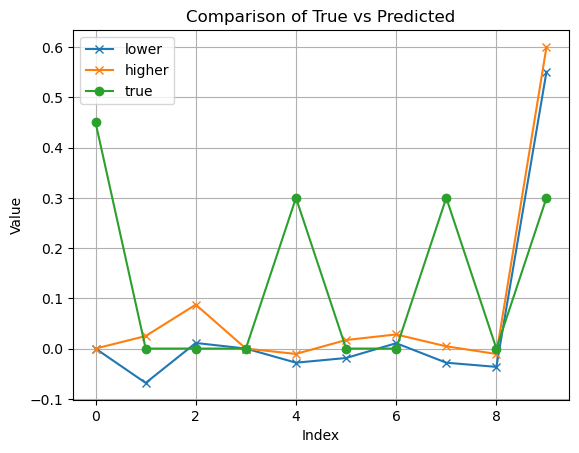

In [115]:
#compare predicted a parameters of link 7 to true value
plt.plot(CI[:,0] , label='lower', marker='x')
plt.plot(CI[:,1], label='higher', marker='x')
plt.plot(a_link7_true, label='true', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

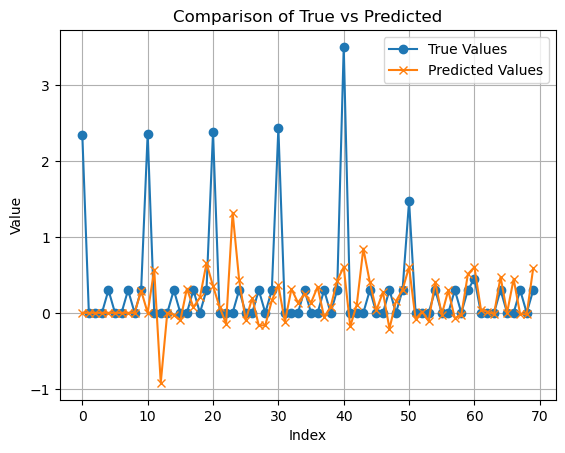

In [116]:
#part 2 begin
#compare predicted a parameters of all links to true value
plt.plot(a_true, label='True Values', marker='o')
plt.plot(a_pred, label='Predicted Values', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
#calculate  F-statistics for all link regression
u_all_mean = np.mean(u)
TSS = np.sum((u - u_all_mean)**2)
RSS = np.sum((u - u_pred)**2)
n, p = Y.shape
F_stat = ((TSS - RSS) / p) / (RSS / (n - p -1))
print("F-statistic =", F_stat)

F-statistic = 5550.841640790084


In [118]:
#Adjusted R-squared for all link regression
R_squared = 1-RSS/TSS
Adj_R_squared_all = 1-((1-R_squared)*(n-1)/(n-p-1))
print("Adj_R_squared =", Adj_R_squared_all)

Adj_R_squared = 0.8473134647041989


In [119]:
#Confidence intervals
sigma_squared = np.sum((u- u_pred)**2)/(n-p)
XtX_inv = np.linalg.pinv(Y.T @ Y)
SE = np.sqrt(np.maximum(0, np.diag(XtX_inv) * sigma_squared)).reshape(p,1)
confidence = 0.99           # confidence interval
alpha = 1 - confidence      # 
t_star = t.ppf(1 - alpha / 2, n-p)
CI = np.column_stack([a_pred  - t_star * SE, a_pred  + t_star * SE])
print("CI", CI)

CI [[ 0.00000000e+00  0.00000000e+00]
 [ 4.10078663e-16  4.10078663e-16]
 [-1.22488803e-15 -1.22488803e-15]
 [ 2.38834020e-16  2.38834020e-16]
 [-5.49218179e-16 -5.49218179e-16]
 [-3.95863938e-16 -3.95863938e-16]
 [ 7.37441086e-16  7.37441086e-16]
 [-5.08556644e-16 -5.08556644e-16]
 [-4.28740161e-16 -4.28740161e-16]
 [ 9.02429882e-02  4.92983595e-01]
 [-6.12580937e-13  6.14407638e-13]
 [ 1.69677385e-01  9.69898797e-01]
 [-1.06897672e+00 -7.75581678e-01]
 [-1.19113396e-13  1.17674149e-13]
 [-1.78819351e-01  1.24754642e-01]
 [-3.67677761e-01  1.68015352e-01]
 [ 7.52433734e-02  5.62047919e-01]
 [-1.04411259e-01  2.48724632e-01]
 [-3.82929622e-02  4.45682961e-01]
 [ 4.31851091e-01  8.74872462e-01]
 [ 3.25625421e-01  3.82340533e-01]
 [-1.94413684e-01  3.49594003e-01]
 [-2.48998044e-01 -3.54694357e-02]
 [ 1.25636477e+00  1.37987402e+00]
 [ 2.09729532e-01  6.50769560e-01]
 [-2.62301979e-01  6.89640968e-02]
 [ 4.50954296e-02  3.47064322e-01]
 [-4.14244601e-01  8.14990242e-02]
 [-3.39795467e-01

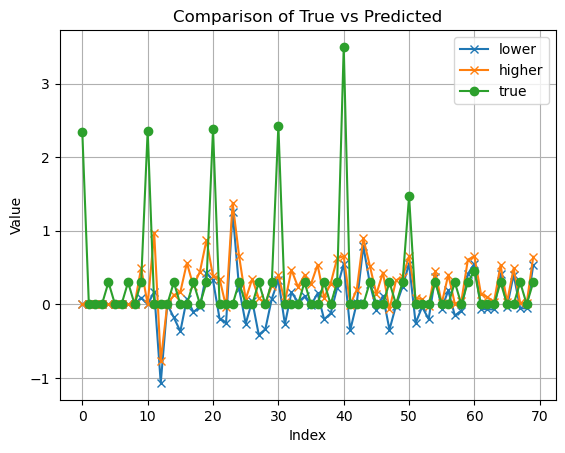

In [121]:
#compare predicted a parameters to true value
plt.plot(CI[:,0] , label='lower', marker='x')
plt.plot(CI[:,1], label='higher', marker='x')
plt.plot(a_true, label='true', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
#plot the torque prediction error for each joint (optional)
#process the display data on joint basis
u_disp = u.reshape(-1,7)
u_pred_disp  = u_pred.reshape(-1,7)

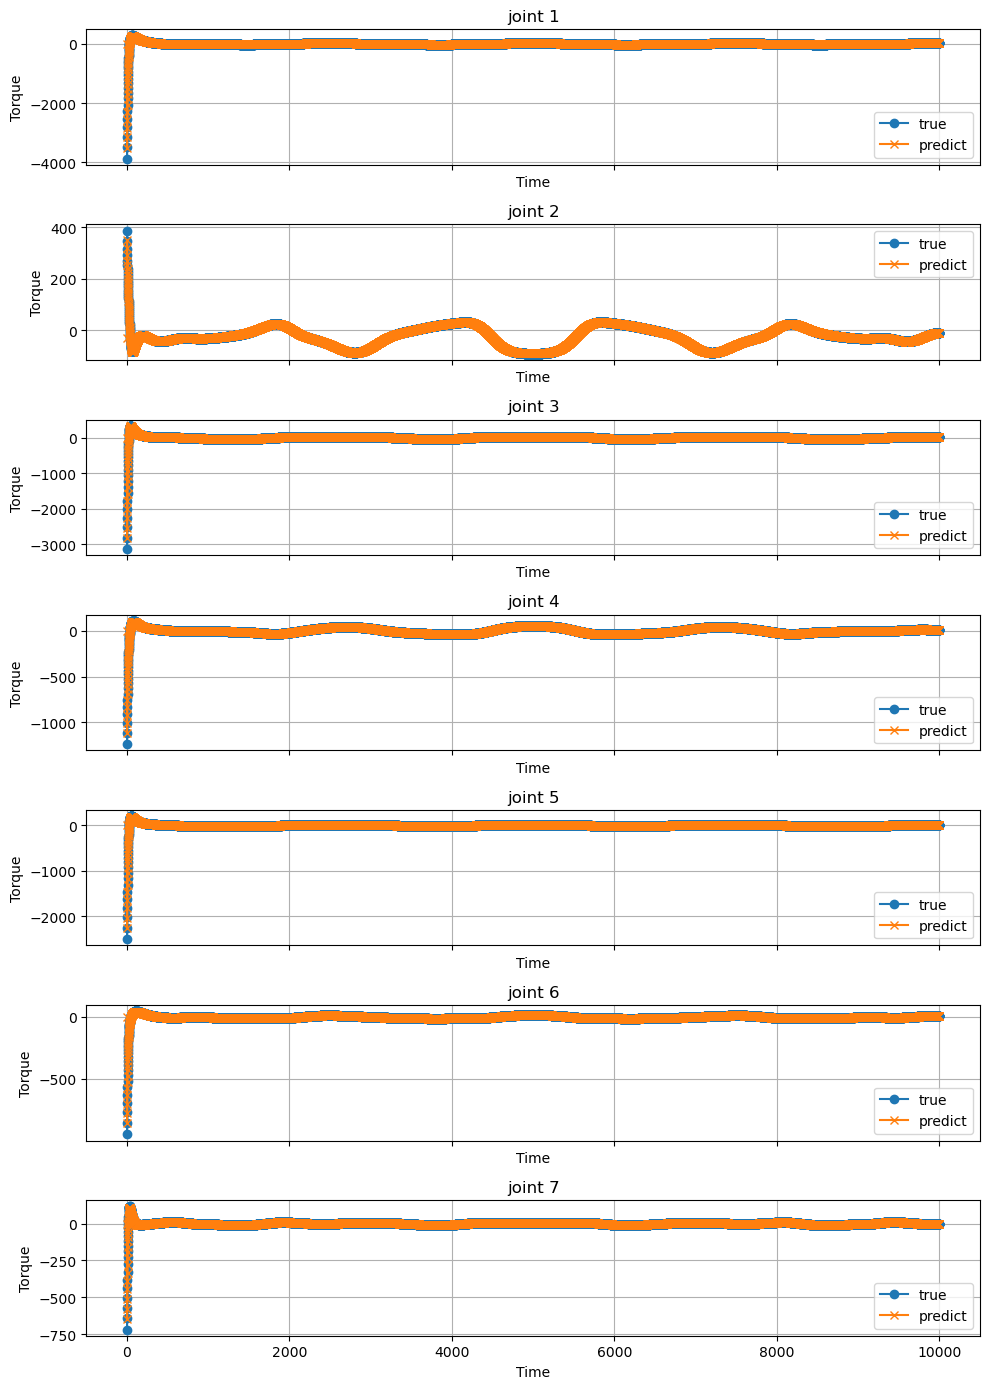

In [123]:
#show torqur values
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 14), sharex=True)
for i, ax in enumerate(axes.flat):
    ax.plot(u_disp[:,i] , label='true', marker='o')
    ax.plot(u_pred_disp[:,i] , label='predict', marker='x')
  
    ax.set_title(f'joint {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Torque')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

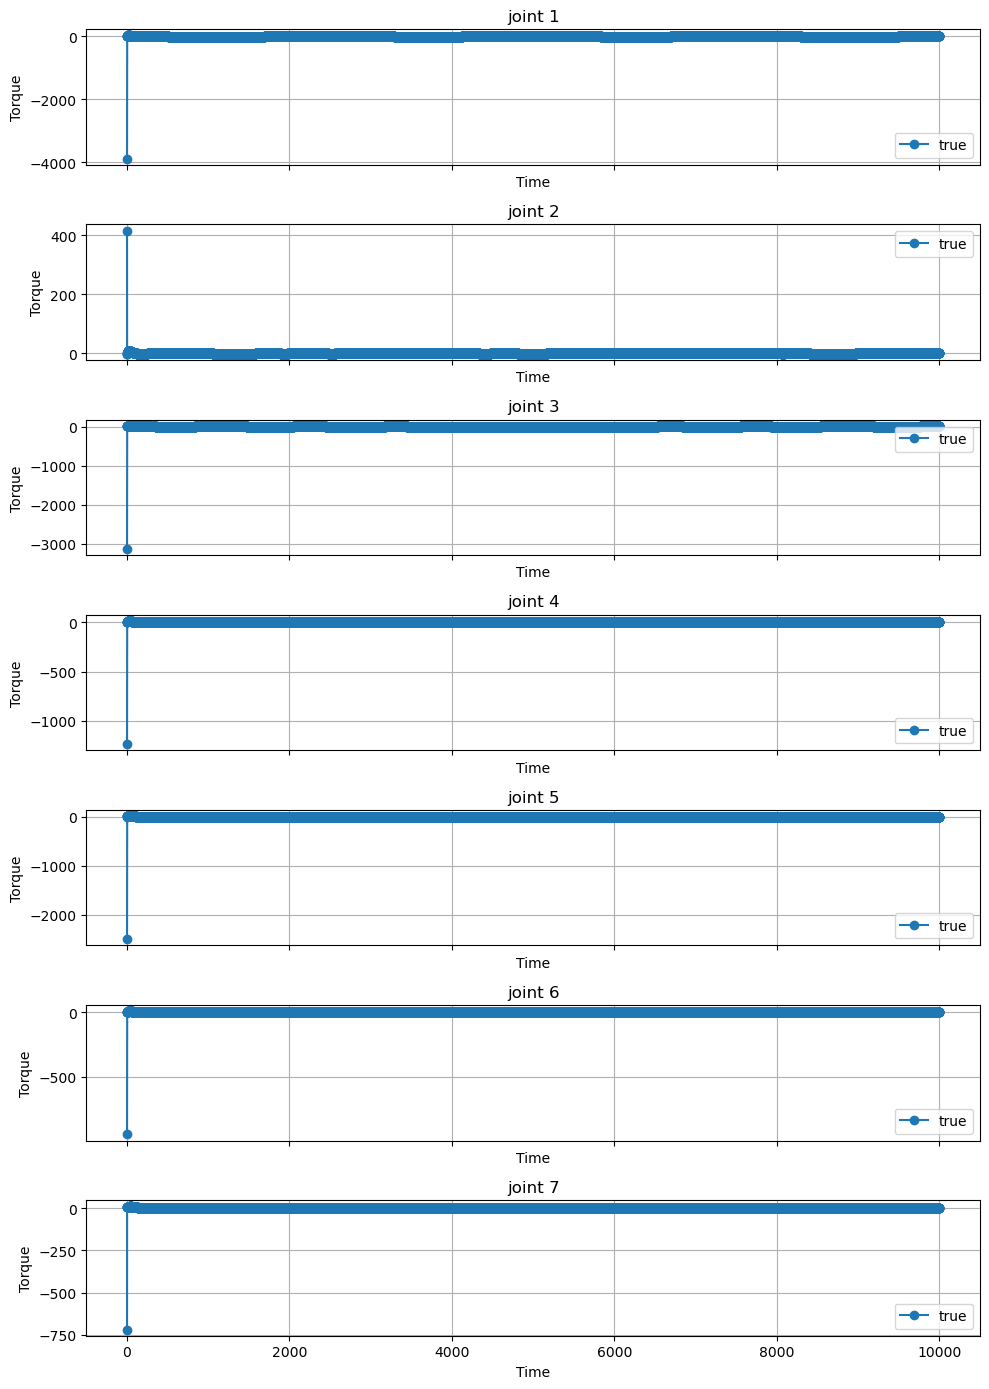

In [124]:
#show torque errors
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 14), sharex=True)
for i, ax in enumerate(axes.flat):
    ax.plot(u_disp[:,i]-u_pred_disp[:,i] , label='true', marker='o')
    ax.set_title(f'joint {i+1}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Torque')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()